In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [65]:
df = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_data_main.xlsx')
df

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
0,5940081728543144960,Кошки,5,False,4,Кот 2 года ко всему приучен,27,22,4,Кот не пакостит совсем,...,4.0,5.0,270,54.000000,5,20,0.02,0.25,0.07,-0.894136
1,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198
2,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
3,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
4,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
49969,5406398888000874496,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
49970,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
49971,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089


In [35]:
def outlier(df, col):
    f_b = df[col].quantile(0.25)
    s_b = df[col].quantile(0.75)
    iqr = s_b - f_b
    lower = f_b - 3 * iqr
    higher = s_b + 3 * iqr
    df.drop(df[(df[col] < lower) | (df[col] > higher)].index, inplace=True)
    return df

In [36]:
outlier(df, 'page_views_by_day')

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
1,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198
2,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
3,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
4,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
5,8521482419013598208,Кошки,25,False,1,Шотландская,11,98,14,"Кот. Не кастрированный, в связи с частыми длит...",...,3.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.650743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
49969,5406398888000874496,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
49970,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
49971,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089


In [37]:
import seaborn as sns

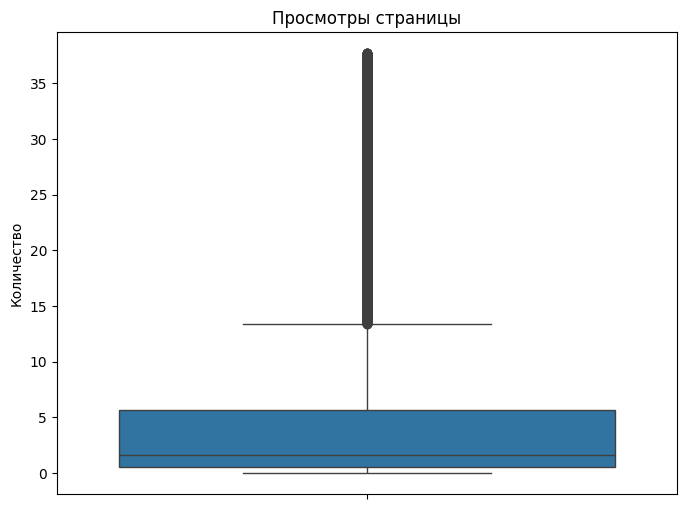

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['page_views_by_day'])
plt.title('Просмотры страницы')
plt.ylabel('Количество')
plt.show()

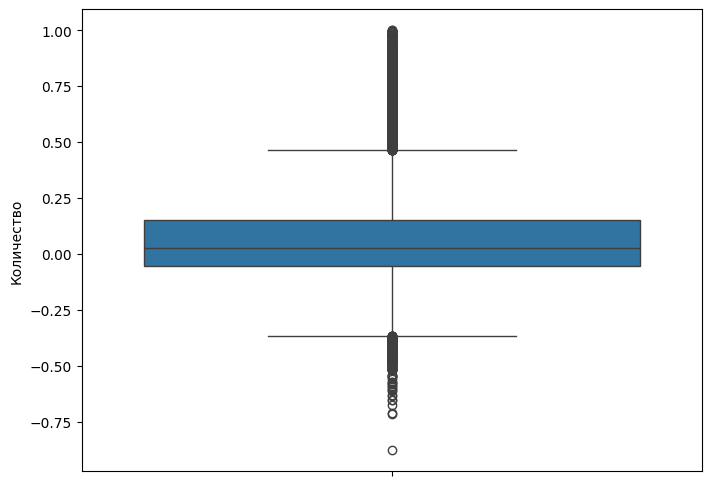

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['sentiment'])
plt.ylabel('Количество')
plt.show()

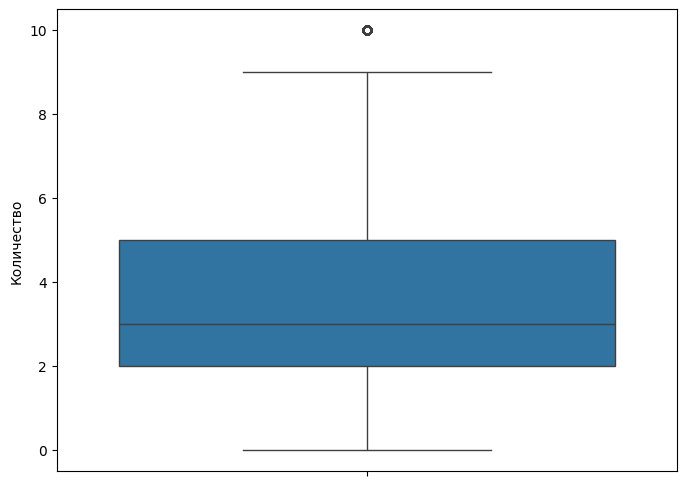

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['photo_count'])
plt.ylabel('Количество')
plt.show()

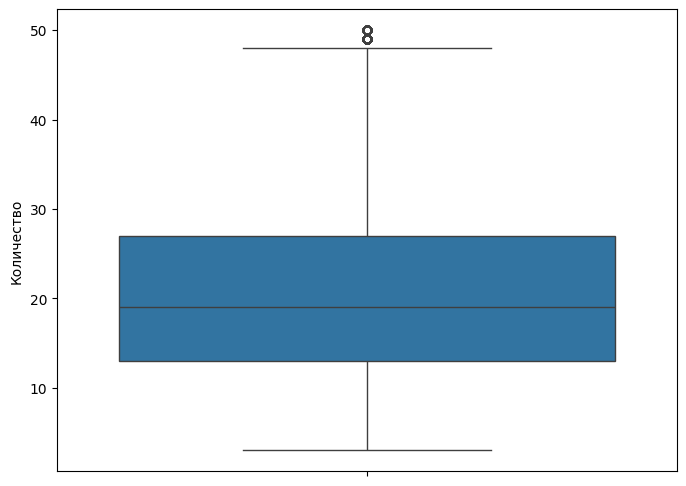

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['title_length'])
plt.ylabel('Количество')
plt.show()

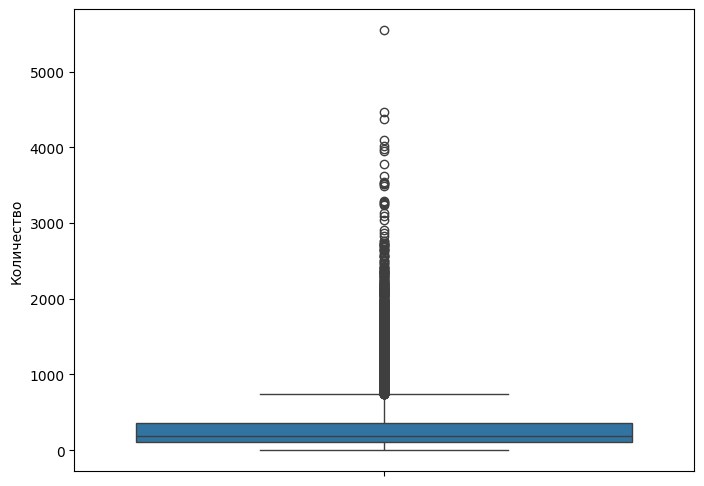

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['description_length'])
plt.ylabel('Количество')
plt.show()

In [43]:
for k in ['photo_count', 'title_length', 'description_length']:
    outlier(df, k)

In [44]:
X = df[['photo_count', 'title_length', 'description_length', 'sentiment']]
y = df['page_views_by_day']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = GradientBoostingRegressor(random_state=42)

In [47]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5],  
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [50]:
print(f'Лучшие параметры: {grid_search.best_params_}')
best_model = grid_search.best_estimator_


Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [51]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка с лучшими гиперпараметрами: {mse}')

Среднеквадратичная ошибка с лучшими гиперпараметрами: 52.522599788658184


In [53]:
features = ['photo_count', 'title_length', 'description_length', 'sentiment']


In [54]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

title_length: 0.4291858453738085
sentiment: 0.273536700318628
description_length: 0.23390317962778753
photo_count: 0.06337427467977595


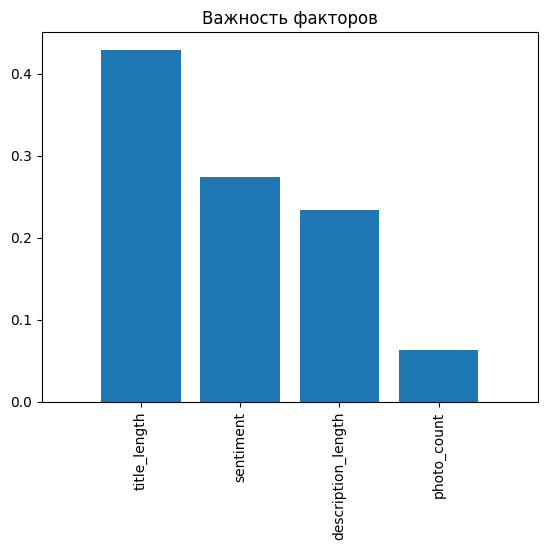

In [55]:
for f in range(X.shape[1]):
    print(f'{features[indices[f]]}: {importances[indices[f]]}')

plt.figure()
plt.title("Важность факторов")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
for k in ['photo_count', 'title_length', 'description_length', 'page_views_by_day']:
    outlier(df, k)

In [59]:
df

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,seller_count_reviews,seller_rating,page_views,page_views_by_day,contacts,favorites,conversion_page_views_contacts_%,conversion_page_views_favorites_%,conversion_page_views_favorites_contacts_%,sentiment
1,6442878243383320576,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,-0.876198
2,1007842829568802048,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,23.0,5.0,33,16.500000,0,1,0.00,0.00,0.03,-0.714857
3,7914380850877753344,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1.0,5.0,72,2.880000,1,3,0.01,0.33,0.04,-0.710234
4,6210833791942923264,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,13.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.673896
5,8521482419013598208,Кошки,25,False,1,Шотландская,11,98,14,"Кот. Не кастрированный, в связи с частыми длит...",...,3.0,5.0,19,0.760000,1,1,0.05,1.00,0.05,-0.650743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,5841270525617292288,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,0.0,0.0,19,0.760000,0,0,0.00,NaN,0.00,0.995826
49969,5406398888000874496,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,2.0,5.0,56,2.240000,1,1,0.02,1.00,0.02,0.997066
49970,4649905965887619072,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,1.0,1.0,5,0.454545,0,0,0.00,NaN,0.00,0.997077
49971,3002289748139043840,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,0.0,0.0,36,1.440000,0,0,0.00,NaN,0.00,0.999089


In [66]:
X = df[['photo_count', 'title_length', 'description_length', 'sentiment']]
y = df['page_views_by_day']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
best_degree = 0
best_model = None
best_score = float('inf')

for degree in range(1, 6):  
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    # Оценка на тестовой выборке
    X_poly_test = poly.transform(X_test)
    y_pred = model.predict(X_poly_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_score:
        best_score = mse
        best_degree = degree
        best_model = model

Лучшая степень полинома: 5
MSE лучшей модели: 4998.464405122298
Коэффициенты модели: [ 5.42930102e-13  3.62715147e-13  1.39293285e-12 -1.66147252e-10
 -1.70901422e-13  2.73979060e-11  3.99472638e-11  1.44930824e-10
 -6.56261559e-13  1.05610928e-10 -2.80512168e-09 -5.91257191e-12
 -8.07049272e-08 -4.04626225e-11 -5.87731862e-14  2.79736633e-10
  4.20094490e-10  5.21577024e-09 -3.71143777e-12  8.89084999e-10
  2.39909816e-09 -2.27908061e-11 -2.99375119e-08 -1.89219037e-10
 -1.73745916e-13  3.99441188e-09 -1.94515353e-08 -2.20978750e-10
 -1.35158493e-06 -1.24954940e-09 -2.01996129e-12  1.70487803e-09
 -9.54765379e-09 -1.76659648e-11 -4.20742391e-14  2.75675751e-09
  4.10366624e-09  5.79366350e-08 -2.60683793e-11  6.13906282e-09
  6.47696733e-08 -1.31511936e-10  7.65745212e-07 -1.37372218e-09
 -6.29780085e-13  1.62744799e-08  1.10820959e-07 -8.52856930e-10
 -9.32814550e-08 -5.09206109e-09 -7.21517507e-12 -2.52300987e-09
 -4.85932506e-08 -6.22466025e-11 -1.42126313e-13  9.60305034e-08
  3.6

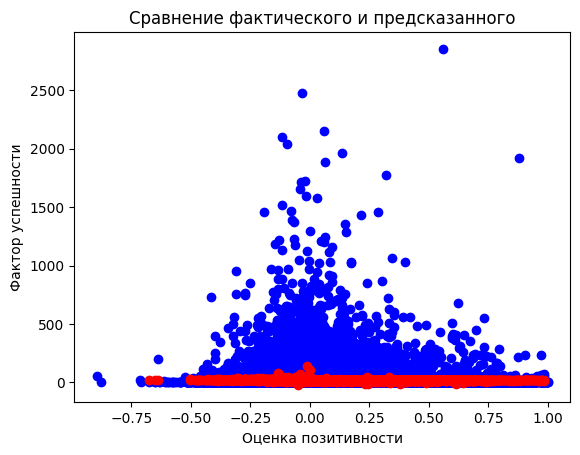

In [69]:
print(f'Лучшая степень полинома: {best_degree}')
print(f'MSE лучшей модели: {best_score}')
print(f'Коэффициенты модели: {best_model.coef_}')

plt.scatter(df['sentiment'], df['page_views_by_day'], color='blue')
plt.scatter(X_test['sentiment'], y_pred, color='red')
plt.xlabel('Оценка позитивности')
plt.ylabel('Фактор успешности')
plt.title('Сравнение фактического и предсказанного')
plt.show()